$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}$

# Linear Dimensionality Reduction

## Principal Components Analysis (PCA)

Principal Components Analysis (PCA) is a way to find and use directions in the data space along which data samples vary the most.

Assume samples have $D$ attributes, meaning each sample is
$D$-dimensional.  We want to linearly project each sample to a smaller space,
of dimension $M$ such that as much information about each sample is maintained as possible.  One way to characterize the information is by the variance of the data.  We want the the projected data to have the maximum variance. 

Let's assume each sample $\xv_n$ has zero mean.  For $M=1$, we want
the direction vector (unit length) $\uv_1$ that maximizes the variance
of each projected sample. This variance is
$$
\frac{1}{N} \sum_{n=1}^N (\uv_1^T \xv_n)^2 = \uv_1^T \Sv \uv_1
$$
where
$$
\Sv = \frac{1}{N} \sum_{n=1}^N \xv_n \xv_n^T
$$
To maximize $\uv_1^T \Sv \uv_1$ in a non-trivial way, we constrain
$\uv_1^T \uv_1 = 1$.  This constraint is added with a Lagrange
multipler so that we want $\uv_1$ that maximizes
$$
 \uv_1^T \Sv \uv_1+ \lambda_1(1-\uv_1^T \uv_1)
$$
Setting the derivative of this with respect to $\uv_1$ equal to zero we find
that
$$
\Sv \uv_1 = \lambda_1 \uv_1
$$
so $\uv_1$ is an eigenvector of $\Sv$ and $\lambda_1$ is an eigenvalue
that is the variance of the projected samples.

Additional directions, all orthogonal to each other, are found by the
eigendecomposition of $\Sv$, or, equivalently, the singular value
decomposition of data sample matrix $\Xv$ with mean zero.  
$$
\Uv \Sigmav \Vv^T = \Xv
$$
The columns of $\Vv$ are the eigenvectors of $\Sv$ and the elements of the
diagonal matrix $\Sigmav$ are the square root of the eigenvalues.

    X = X - np.mean(X,axis=0)
    U,s,V = np.linalg.svd(X)
    V = V.T
    
Then, to project onto the eigenvectors, just

    proj = X @ V

Let's generate some two-dimensional samples from a Normal distribution
with mean [0,4] and covariance matrix 
$\Sigma=\begin{bmatrix} 0.9 & 0.8\\ 0.8 & 0.9 \end{bmatrix}$.  Then we
will calculate the svd of the samples and project the samples to the
two eigenvectors.

In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
np.random.multivariate_normal?

In [168]:
n_samples = 200
np.random.multivariate_normal([0, 4], [[0.9, 0.8], [0.8, 0.9]], n_samples).shape

(200, 2)

We can write our own multivariate normal random number generater like this, using the univariate np.random.normal function.

In [169]:
def mv_normal(n, mean, sigma):                                                 
    mean = np.array(mean) # to allow entry of values as simple lists                                                       
    sigma = np.array(sigma)                                                     
    X = np.random.normal(0, 1, n * len(mean)).reshape((n, len(mean)))                
    return np.dot(X, np.linalg.cholesky(sigma)) + mean        

N = 200
data = mv_normal(N, [0, 4], [[0.9, 0.8], [0.8, 0.9]])
data.shape

(200, 2)

In [170]:
means = np.mean(data, axis=0)
datan = data - means

U, S, V = np.linalg.svd(datan)
V = V.T
V.shape

(2, 2)

In [171]:
V

array([[-0.97654428,  0.21531666],
       [-0.21531666, -0.97654428]])

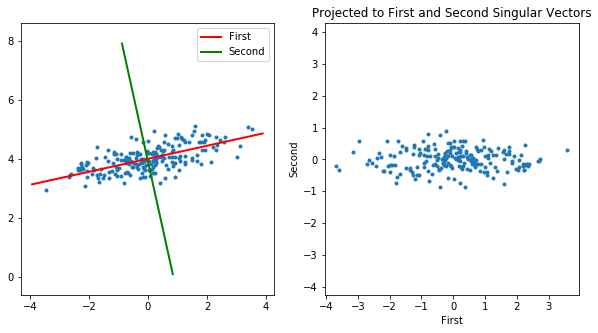

In [172]:
def drawline(v, means, length, color, label):
  p1 = means - v * length / 2
  p2 = means + v * length / 2
  plt.plot([p1[0], p2[0]], [p1[1], p2[1]], label=label, color=color, linewidth=2)


def plot_original_and_transformed(data, V):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(data[:, 0], data[: ,1], '.')
    means = np.mean(data, axis=0)
    drawline(V[:, 0], means, 8, "red", "First")
    drawline(V[:, 1], means, 8, "green", "Second")
    leg = plt.legend()
    plt.axis('equal')
    plt.gca().set_aspect('equal')


    plt.subplot(1, 2, 2)    
    proj = (data - means) @ V
    plt.plot(proj[:, 0], proj[:, 1], '.')
    plt.axis('equal')
    plt.gca().set_aspect('equal')
    plt.xlabel("First")
    plt.ylabel("Second")
    plt.title("Projected to First and Second Singular Vectors");
    
plot_original_and_transformed(data, V)

Now, if we have two classes of data, we might be able to classify the
data well with just the projection onto just one eigenvector.    Could
be either eigenvector.

First, with second class having mean [-5,3] and 
$\Sigma=\begin{bmatrix} 0.9 & 0.8\\ -0.8 & 0.9 \end{bmatrix}$.

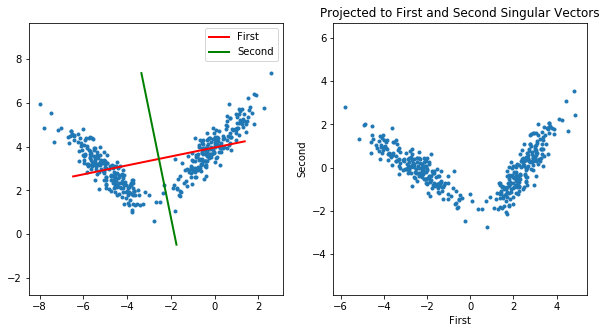

In [173]:
N = 200
data1 = np.random.multivariate_normal([0, 4], [[0.9 ,0.8], [0.8, 0.9]], N)
data2 = np.random.multivariate_normal([-5, 3], [[0.9, -0.8], [-0.8, 0.9]], N)
data = np.vstack((data1, data2))

means = np.mean(data, axis=0)

U, S ,V = np.linalg.svd(data - means)
V = V.T

plot_original_and_transformed(data, V)

And again, with first class 
$\Sigma=\begin{bmatrix} 0.9 & 0.2\\ 0.2 & 20 \end{bmatrix}$
and second class having
$\Sigma=\begin{bmatrix} 0.9 & 0.2\\ -0.2 & 20 \end{bmatrix}$.

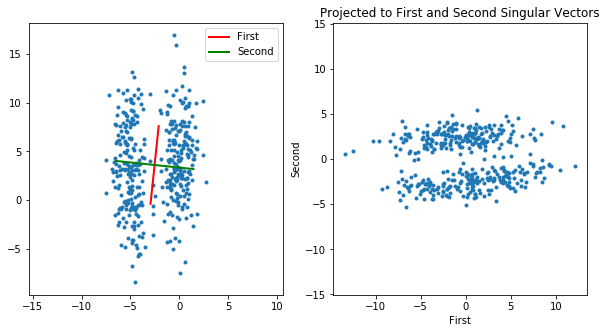

In [174]:
N = 200
data1 = np.random.multivariate_normal([0, 4], [[0.9 ,0.2], [0.2, 20]], N)
data2 = np.random.multivariate_normal([-5, 3], [[0.9, -0.2], [-0.2, 20]], N)
data = np.vstack((data1, data2))

means = np.mean(data, axis=0)

U, S ,V = np.linalg.svd(data - means)
V = V.T

plot_original_and_transformed(data, V)

# Examples of Linear Dimensionality Reduction

## Principal Components Analysis (PCA)

Let's apply PCA to the MNIST digits.

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import pickle

In [176]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape((-1,1))

Xtest = test_set[0]
Ttest = test_set[1].reshape((-1,1))

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((50000, 784), (50000, 1), (10000, 784), (10000, 1))

In [177]:
Xmean = Xtrain.mean(axis=0)

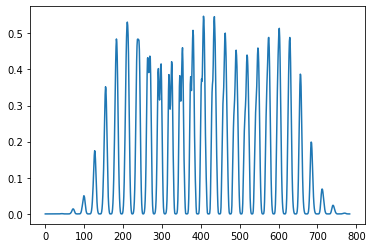

In [178]:
plt.plot(Xmean);

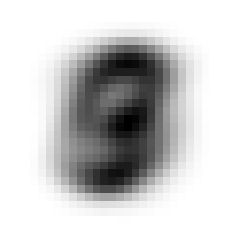

In [179]:
plt.imshow(-Xmean.reshape((28, 28)), cmap='gray')
plt.axis('off');

In [180]:
Xmean.shape

(784,)

In [181]:
U, S, V = np.linalg.svd(Xtrain - Xmean, full_matrices=False)
V = V.T

In [182]:
U.shape, S.shape, V.shape

((50000, 784), (784,), (784, 784))

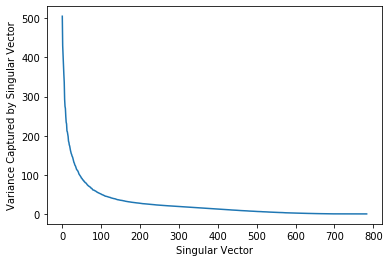

In [183]:
plt.plot(S)
plt.xlabel('Singular Vector')
plt.ylabel('Variance Captured by Singular Vector');

What do the first 16 singular vectors look like?

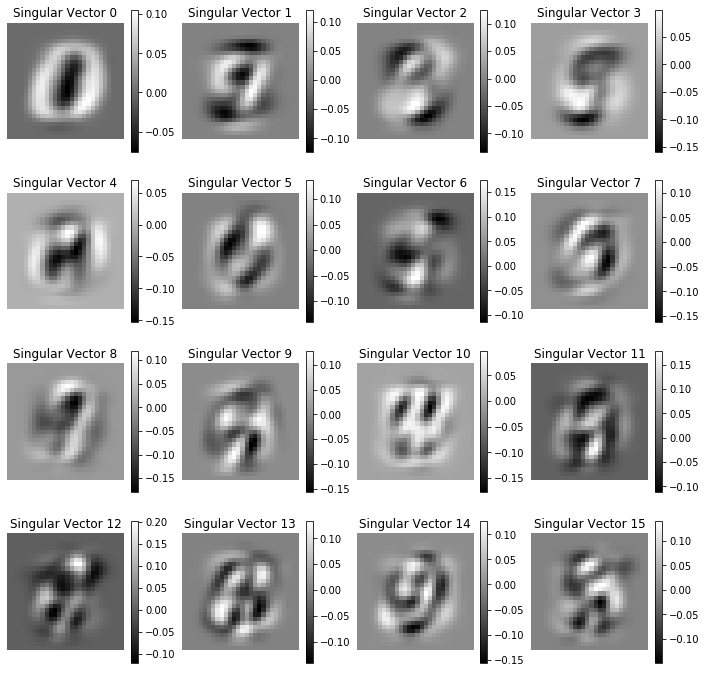

In [184]:
plt.figure(figsize=(12, 12))
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.imshow(V[:, vi].reshape((28, 28)), cmap='gray')
    plt.title(f'Singular Vector {vi}')
    plt.axis('off')
    plt.colorbar()

How about the last 16?

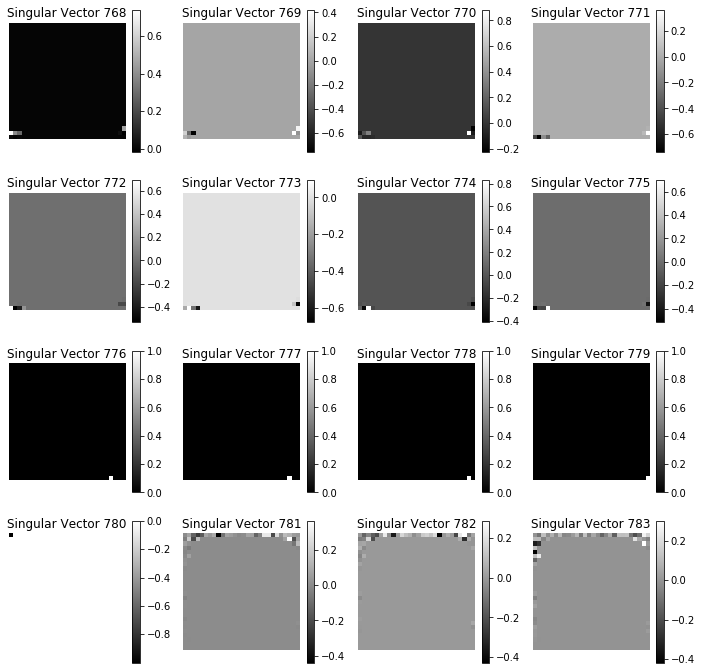

In [185]:
plt.figure(figsize=(12, 12))
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.imshow(V[:, 784 - 16 + vi].reshape((28, 28)), cmap='gray')
    plt.title(f'Singular Vector {784 - 16 + vi}')
    plt.axis('off')
    plt.colorbar()

In [186]:
X = Xtrain[:40, :]
X = X - Xmean
X.shape

(40, 784)

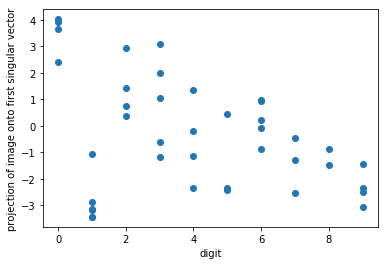

In [187]:
p = (Xtrain[:40, :] - Xmean) @ V[:, 0:1]
plt.plot(Ttrain[:40,0], p, 'o')
plt.xlabel('digit')
plt.ylabel('projection of image onto first singular vector');

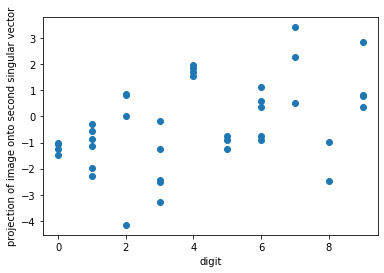

In [188]:
p = (Xtrain[:40, :] - Xmean) @ V[:, 1:2]
plt.plot(Ttrain[:40,0], p, 'o')
plt.xlabel('digit')
plt.ylabel('projection of image onto second singular vector');

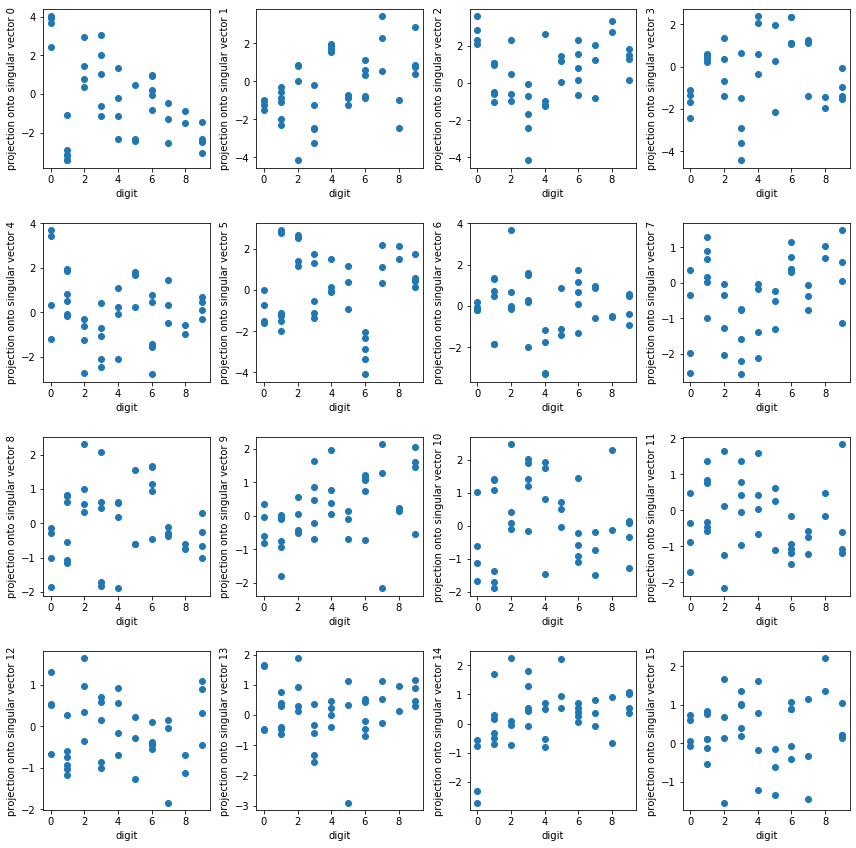

In [189]:
plt.figure(figsize=(12, 12))
p = (Xtrain[:40, :] - Xmean) @ V[:, :16]
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.plot(Ttrain[:40, 0], p[:, vi], 'o')
    plt.xlabel('digit')
    plt.ylabel(f'projection onto singular vector {vi:d}')
plt.tight_layout()

Here is how we can check that two singular vectors are indeed orthogonal.  Their dot product must be 0.

In [190]:
V[:, 2:3].T @ V[:, 1:2]

array([[0.]], dtype=float32)

Let's take a look at an image, and its reconstruction using its projection on the first singular vector

(-0.5, 27.5, 27.5, -0.5)

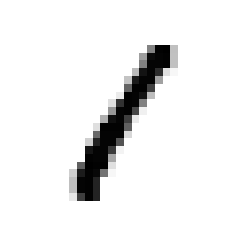

In [191]:
plt.imshow(-Xtrain[3, :].reshape((28, 28)), cmap='gray')
plt.axis('off')

In [192]:
p_all = (Xtrain[3:4, :] - Xmean) @ V  # projecting to all

In [193]:
p_all.shape

(1, 784)

In [194]:
(V[:, 0:1] @ p_all[:, 0:1]).shape

(784, 1)

In [195]:
recon = (V[:, 0:1] @ p_all[:, 0:1]).T + Xmean

In [196]:
recon.shape

(1, 784)

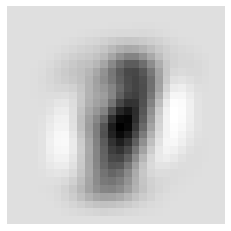

In [197]:
plt.imshow(-recon.reshape((28,28)), cmap='gray')
plt.axis('off');

What if we use the first two singular vectors, or the first three? How many dimensions to we need to get a reconstruction that is close to the original image?

In [198]:
proj.shape

(1, 784)

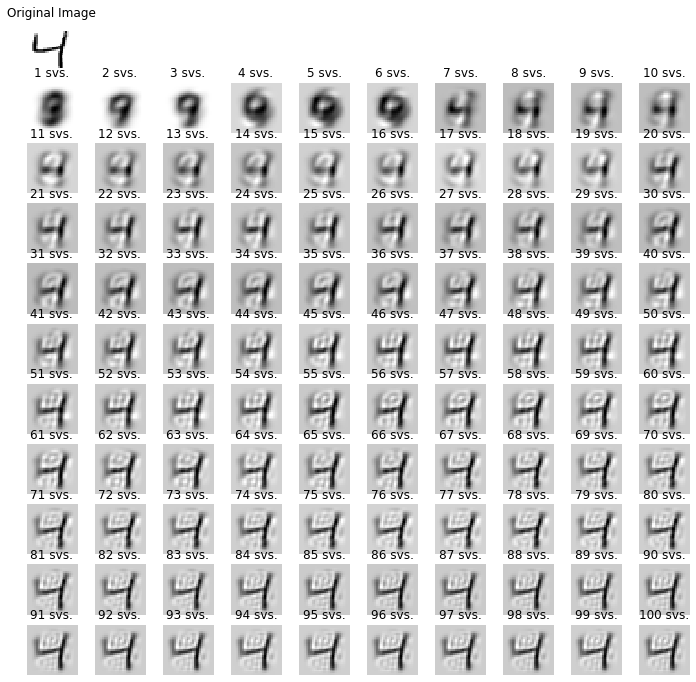

In [199]:
plt.figure(figsize=(12, 12))

X = Xtrain[2, :]

proj = (X - Xmean) @ V
proj = proj.reshape(1, 784)

plt.subplot(11, 10, 1)
plt.imshow(-X.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title('Original Image')

ploti = 10
for n_sv in range(1, 101):
    ploti += 1
    plt.subplot(11, 10, ploti)
    recon = (V[:, 0:n_sv] @ proj[:, 0:n_sv].T).T + Xmean
    plt.imshow(-recon.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'{n_sv} svs.')

In [200]:
V.shape

(784, 784)

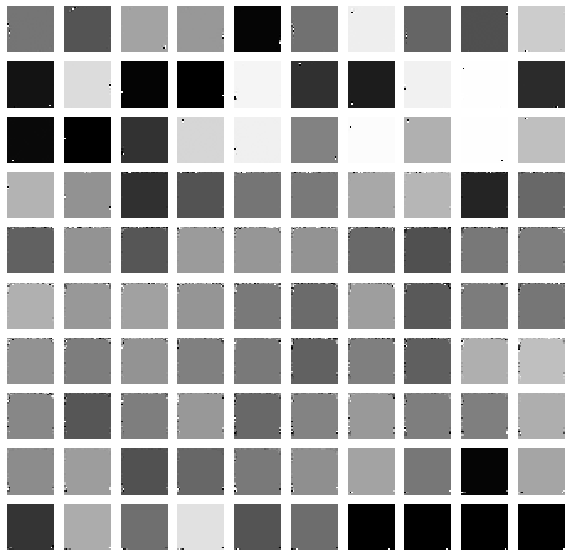

In [201]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(V[:, 680+i].reshape((28,28)), cmap='gray')
    plt.axis('off')

In [215]:
import neuralnetworksA4 as nn

nnet = nn.NeuralNetworkClassifier(784, [100], 10)
nnet.train(Xtrain, Ttrain, 100, 0.01, method='adam', verbose=True)

Adam: Epoch 10 Error=0.96286
Adam: Epoch 20 Error=0.97368
Adam: Epoch 30 Error=0.97915
Adam: Epoch 40 Error=0.98273
Adam: Epoch 50 Error=0.98544
Adam: Epoch 60 Error=0.98763
Adam: Epoch 70 Error=0.98946
Adam: Epoch 80 Error=0.99102
Adam: Epoch 90 Error=0.99236
Adam: Epoch 100 Error=0.99351


NeuralNetworkClassifier(784, [100], 10, 'tanh')

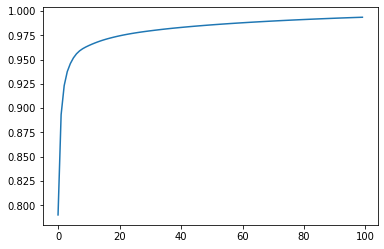

In [216]:
plt.plot(nnet.error_trace);

In [228]:
def percent_correct(T, C):
    return np.sum(C == T) / len(T) * 100

def print_percent_correct(nnet, Xtrain, Ttrain, Xtest, Ttest):
    Ctrain, _ = nnet.use(Xtrain)
    Ctest, _ = nnet.use(Xtest)
    Ptrain = np.sum(Ctrain == Ttrain) / len(Ttrain) * 100
    Ptest = np.sum(Ctest == Ttest) / len(Ttest) * 100
    print(f'% Correct: Train {percent_correct(Ttrain, Ctrain):.2f} Test {percent_correct(Ttest, Ctest):.2f}')

In [229]:
print_percent_correct(nnet, Xtrain, Ttrain, Xtest, Ttest)

ValueError: operands could not be broadcast together with shapes (50000,784) (3,) 

Let's try training a neural net that receives just the projections of each image onto the first three singular vectors, so three values for each image, instead of 784!!!

In [230]:
Xmean = Xtrain.mean(0)
Xtrainm = Xtrain - Xmean
Xtestm = Xtest - Xmean

In [231]:
nnet = nn.NeuralNetworkClassifier(3, [100], 10)
Xtrainm3 = Xtrainm @ V[:, :3]
Xtestm3 = Xtestm @ V[:, :3]
nnet.train(Xtrainm3, Ttrain, 100, 0.01, method='adam', verbose=True)

Adam: Epoch 10 Error=0.86121
Adam: Epoch 20 Error=0.87212
Adam: Epoch 30 Error=0.87494
Adam: Epoch 40 Error=0.87710
Adam: Epoch 50 Error=0.87892
Adam: Epoch 60 Error=0.88026
Adam: Epoch 70 Error=0.88116
Adam: Epoch 80 Error=0.88189
Adam: Epoch 90 Error=0.88250
Adam: Epoch 100 Error=0.88300


NeuralNetworkClassifier(3, [100], 10, 'tanh')

In [232]:
print_percent_correct(nnet, Xtrainm3, Ttrain, Xtestm3, Ttest)

% Correct: Train 49.89 Test 51.28


So, projecting 784 down to 3 dimensions does not do well.  Let's check accuracy for projecting down to dimensions from 1 to 60.

In [235]:
results = []
for n_dim in range(1, 60, 2):
    
    Xtrainmn = Xtrainm @ V[:, :n_dim]
    Xtestmn = Xtestm @ V[:, :n_dim]

    nnet = nn.NeuralNetworkClassifier(n_dim, [100], 10)    
    nnet.train(Xtrainmn, Ttrain, 100, 0.01, method='adam', verbose=False)
    
    Ctrain, _ = nnet.use(Xtrainmn)
    Ctest, _ = nnet.use(Xtestmn)
    result = [n_dim, percent_correct(Ttrain, Ctrain), percent_correct(Ttest, Ctest)]
    print(result)
    results.append(result)

[1, 30.436000000000003, 31.25]
[3, 49.95, 51.66]
[5, 72.18599999999999, 74.05000000000001]
[7, 83.818, 84.76]
[9, 86.642, 86.95]
[11, 88.82, 89.2]
[13, 90.934, 91.3]
[15, 91.58800000000001, 92.03]
[17, 92.298, 92.78]
[19, 92.774, 93.02]
[21, 93.176, 93.58999999999999]
[23, 93.824, 93.67]
[25, 94.274, 94.42]
[27, 94.432, 94.44]
[29, 94.748, 94.66]
[31, 94.806, 94.77]
[33, 94.998, 94.77]
[35, 95.12, 94.8]
[37, 95.26, 94.66]
[39, 95.35, 94.99]
[41, 95.544, 94.78999999999999]
[43, 95.72800000000001, 94.95]
[45, 95.792, 95.23]
[47, 95.902, 95.09]
[49, 95.956, 95.41]
[51, 96.246, 95.47]
[53, 96.196, 95.36]
[55, 96.22800000000001, 95.3]
[57, 96.358, 95.48]
[59, 96.49600000000001, 95.39999999999999]


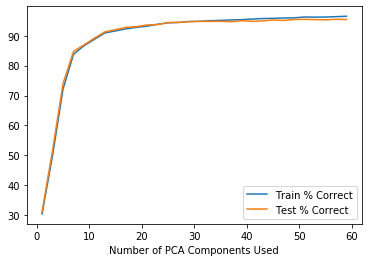

In [236]:
results = np.array(results)
plt.plot(results[:, 0], results[:, 1], label='Train % Correct')
plt.plot(results[:, 0], results[:, 2], label='Test % Correct')
plt.legend()
plt.xlabel('Number of PCA Components Used');

## Compare to regular neural net with 20 units in first layer.

In [245]:
nnet = nn.NeuralNetworkClassifier(784, [20, 100], 10)
# nnet.train(Xtrain, Ttrain, 500, 0.01, method='adam', verbose=True)
nnet.train(Xtrain, Ttrain, 1000, 0.01, method='adam', verbose=True)
nnet

Adam: Epoch 100 Error=0.98876
Adam: Epoch 200 Error=0.99454
Adam: Epoch 300 Error=0.99715
Adam: Epoch 400 Error=0.99842
Adam: Epoch 500 Error=0.99902
Adam: Epoch 600 Error=0.99938
Adam: Epoch 700 Error=0.99958
Adam: Epoch 800 Error=0.99971
Adam: Epoch 900 Error=0.99979
Adam: Epoch 1000 Error=0.99985


NeuralNetworkClassifier(784, [20, 100], 10, 'tanh')

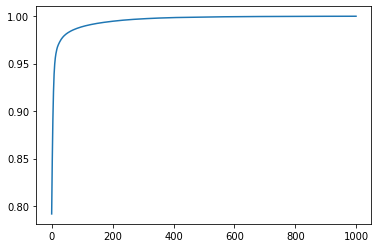

In [246]:
plt.plot(nnet.error_trace);

In [247]:
print_percent_correct(nnet, Xtrain, Ttrain, Xtest, Ttest)

% Correct: Train 99.99 Test 92.46


The weights in the first layer, of 20 units, can be reshaped into images to see what patterns they detect in the digits.

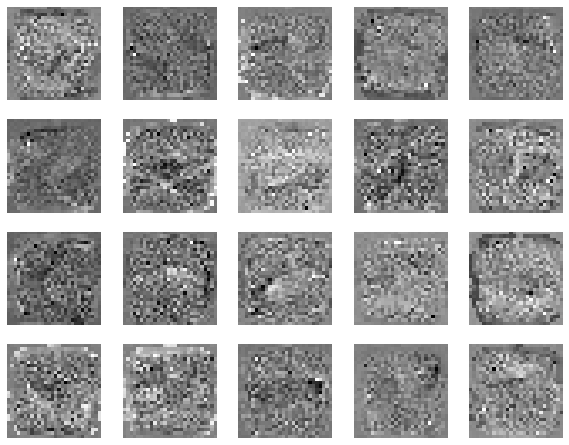

In [249]:
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i + 1) 
    plt.imshow(nnet.Ws[0][1:, i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

Here are the first 20 singular vectors again.

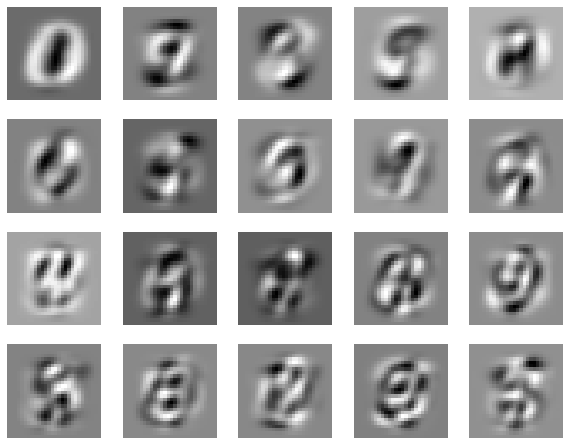

In [243]:
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(V[:,i].reshape((28, 28)), cmap='gray')
    plt.axis('off')